In [1]:
import sys, os
sys.path.append('python\\plot')
print(os.getcwd())


import massPy as mp
import numpy as np
import matplotlib.pyplot as plt

c:\Users\Simon Andersen\Projects\Projects\Thesis\HyperUniformity


In [2]:
def get_dir(Qxx, Qyx, return_S=False):
    """
    get director nx, ny from Order parameter Qxx, Qyx
    """
    S = np.sqrt(Qxx**2+Qyx**2)
    dx = np.abs(np.sqrt((np.ones_like(S) + Qxx/S)/2))
    dy = np.sqrt((np.ones_like(S)-Qxx/S)/2)*np.sign(Qyx)
    
    if return_S:
        return dx, dy, S
    else:
        return dx, dy

In [4]:
ar = mp.archive.loadarchive(path)
print(ar.__dict__)

{'_path': WindowsPath('C:/Users/Simon Andersen/Projects/Projects/Thesis/NematicSimulation/out/test1'), '_compress_full': False, '_compress': False, '_ext': '.json', 'LX': 100, 'LY': 100, 'BC': 0, 'nsteps': 1000, 'nsubsteps': 1, 'ninfo': 100, 'nstart': 0, 'model_name': 'nematic', 'angle': 0.0, 'noise': 0.0, 'rho': 40.0, 'Gamma': 0.1, 'xi': 0.1, 'zeta': 0.05, 'tau': 2.0, 'friction': 0.0, 'LL': 0.01, 'CC': 0.1, 'backflow_on': True, 'num_frames': 11}


In [5]:

i =2
frame = ar._read_frame(i)
step=2
LX, LY = frame.LX, frame.LY

Qxx_dat = frame.QQxx.reshape(LX, LY)
Qyx_dat = frame.QQyx.reshape(LX, LY)


dx, dy, S = get_dir(Qxx_dat, Qyx_dat, return_S=True)
vx, vy = mp.base_modules.flow.velocity(frame.ff, LX, LY)

dyux, dxux = np.gradient(vx)
dyuy, dxuy = np.gradient(vy)

vort = dxuy-dyux
E = dxux + dyuy
R = E**2 - vort**2


In [11]:
defects = mp.nematic.nematicPy.get_defects(Qxx_dat, Qyx_dat, LX, LY)
defects

[{'charge': -0.5, 'pos': [1.5, 98.5]},
 {'charge': 0.5, 'pos': [3.5, 99.5]},
 {'charge': -0.5, 'pos': [57.5, 99.5]},
 {'charge': 0.5, 'pos': [80.5, 99.5]}]

In [4]:
path = 'C:\\Users\\Simon Andersen\\Dokumenter\\Uni\\Speciale\\Hyperuniformity\\nematic_data'

data_dirs = os.listdir(path)
data_dirs = [os.path.join(path, d) for d in data_dirs]
ar = mp.archive.loadarchive(data_dirs[2])

In [6]:
data_dirs[2]

'C:\\Users\\Simon Andersen\\Dokumenter\\Uni\\Speciale\\Hyperuniformity\\nematic_data\\qzk1k30.05_K30.05_qkbt0_z0.1_xi1_LX256_counter0'

In [ ]:
frame_range = np.arange(20,170, 10)
for i in frame_range:
    frame = ar._read_frame(i)
    

    frame = ar._read_frame(i)
    f, s = plt.subplots( figsize=(6,6))
    mp.nematic.plot.director(frame, s)
    mp.nematic.plot.defects(frame, s)

    s.set_title("Director field and defects for frame {}".format(i), y = 1.05)
    s.text(0.35, 1.015, '-1/2', transform=s.transAxes, fontsize=14, verticalalignment='bottom', color='blue', fontweight='bold')
    s.text(0.55, 1.015, '+1/2', transform=s.transAxes, fontsize=14, verticalalignment='bottom', color='green', fontweight='bold')

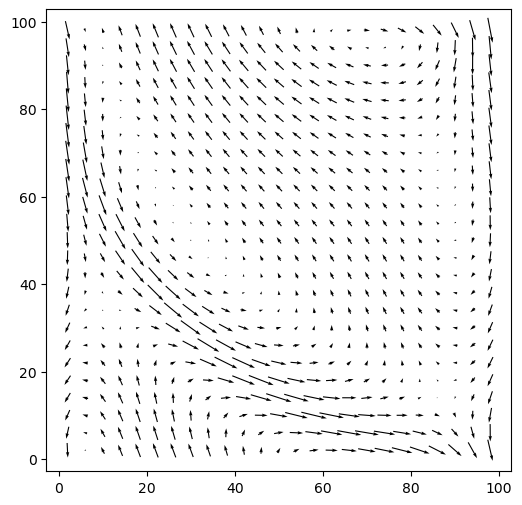

In [8]:
f, s = plt.subplots(figsize = (6,6))
mp.nematic.plot.velocity(frame, s)


In [ ]:
arr = mp.archive.loadarchive(path)
i =2
frame = arr._read_frame(i)
defects = mp.nematic.nematicPy.get_defects(Qxx_dat, Qyx_dat, LX, LY)
print(defects[:5])

# plot director field
f, s = plt.subplots( figsize=(6,6))
mp.nematic.plot.director(frame, s)
mp.nematic.plot.defects(frame, s)


In [7]:
def get_defect_list(archive, LX, LY, idx_first_frame=0, verbose=False):
    """
    Get list of topological defects for each frame in archive
    Parameters:
        archive: massPy archive object
        LX, LY: system size
        verbose: print time to get defect list
    Returns:
        top_defects: list of lists of dictionaries holding defect charge and position for each frame 
    """
    # Initialize list of top. defects
    top_defects = []

    if verbose:
        t_start = time.time()
    if not development_mode:
        Nframes = archive.__dict__['num_frames']
    else:  
        Nframes = num_frames

    # Loop over frames
    for i in range(idx_first_frame, Nframes):
        # Load frame
        frame = archive._read_frame(i)
        Qxx_dat = frame.QQxx.reshape(LX, LY)
        Qyx_dat = frame.QQyx.reshape(LX, LY)
        # Get defects
        defects = mp.nematic.nematicPy.get_defects(Qxx_dat, Qyx_dat, LX, LY)
        # Add to list
        top_defects.append(defects)

    if verbose:
        t_end = time.time() - t_start
        # print 2 with 2 decimals
        print('Time to get defect list: %.2f s' % t_end)

    return top_defects


In [8]:

def fit_func(x, alpha, beta):
        return beta * (alpha) + (alpha) * x


In [9]:
import warnings
from sklearn.neighbors import KDTree
from utils import *

def calc_density_fluctuations(points_arr, window_sizes, boundaries=None, N_center_points=None, Ndof=1, dist_to_boundaries=None, normalize=False, verbose=False):
    """
    Calculates the density fluctuations for a set of points in a 2D plane for different window sizes.
    For each window_size (i.e. radius), the density fluctuations are calculated by choosing N_center_points random points
    inside a region determined by dist_to_boundaries and calculating the number of points within a circle of radius R for each
    of these points, from which the number and density variance can be calculated.

    Parameters:
    -----------
    points_arr : (numpy array) - Array of points in 2D plane
    window_sizes : (numpy array or list) - Array of window sizes (i.e. radii) for which to calculate density fluctuations
    boundaries : (list of lists) - List of tuples with the format [[x_min, x_max], [y_min, y_max]]. If None, no boundaries are used.
    N_center_points : (int) - Number of center points to use for each window size. If None, all points are used.
    Ndof : (int) - Number of degrees of freedom to use for variance calculation
    dist_to_boundaries : (float) - Maximum distance to the boundaries. Centers will be chosen within this region.
    normalize : (bool) - If True, the density fluctuations are normalized by the square of the average density of the system.

    Returns:
    --------
    var_counts : (numpy array) - Array containing the number variance for each window size
    var_densities : (numpy array) - Array containing the density variance for each window size
    """

    # If dist_to_boundaries is not given, use the maxium window size
    dist_to_boundaries = window_sizes[-1] if dist_to_boundaries is None else dist_to_boundaries

    if boundaries is None:
        xmin, xmax = np.min(points_arr[:, 0]), np.max(points_arr[:, 0])
        ymin, ymax = np.min(points_arr[:, 1]), np.max(points_arr[:, 1])
    else:
        xmin, xmax = boundaries[0]
        ymin, ymax = boundaries[1]

    center_mask_x = (points_arr[:, 0] - dist_to_boundaries >= xmin) & (points_arr[:, 0] + dist_to_boundaries <= xmax)
    center_mask_y = (points_arr[:, 1] - dist_to_boundaries >= ymin) & (points_arr[:, 1] + dist_to_boundaries <= ymax)
    center_mask = center_mask_x & center_mask_y


    # Construct mask for points within boundaries
    center_mask_x = (points_arr[:, 0] - dist_to_boundaries >= np.min(points_arr[:, 0])) & (points_arr[:, 0] + dist_to_boundaries <= np.max(points_arr[:, 0]))
    center_mask_y = (points_arr[:, 1] - dist_to_boundaries >= np.min(points_arr[:, 1])) & (points_arr[:, 1] + dist_to_boundaries <= np.max(points_arr[:, 1]))
    center_mask = center_mask_x & center_mask_y
    

    # If N is not given, use all points within boundaries
    Npoints = len(points_arr)
    Npoints_within_boundaries = center_mask.sum()
    N_center_points = Npoints_within_boundaries if N_center_points is None else N_center_points

    if verbose:
        print("Number of points within boundaries: ", Npoints_within_boundaries)
        print("Number of points to use: ", N_center_points)

    if N_center_points > Npoints_within_boundaries:
        if verbose:
            print(f"Warning: N_center_points is larger than the number of points within the boundaries.\
                Using all {Npoints_within_boundaries} points within boundaries instead.")
        N_center_points = Npoints_within_boundaries

    # If N_center_points is equal to Npoints_within_boundaries, use all points within boundaries
    use_all_center_points = (N_center_points == Npoints_within_boundaries)
    if use_all_center_points:
        center_points = points_arr[center_mask]


    # Initialize KDTree
    tree = KDTree(points_arr)

    # Initialize density array, density variance array, and counts variance arrays
    var_counts = np.empty_like(window_sizes, dtype=float)
    var_densities = np.empty_like(var_counts)
    av_counts = np.empty_like(var_counts)

    for i, radius in enumerate(window_sizes):
        if use_all_center_points:
            pass
        else:
            indices = np.random.choice(np.arange(Npoints)[center_mask], N_center_points, replace=False)
            center_points = points_arr[indices]

        N = center_points.shape[0]
 
        # Calculate no. of points within circle for each point
        counts = tree.query_radius(center_points, r=radius, count_only=True)

        # Calculate average counts
        av_counts[i] = np.mean(counts)

        # Calculate number and density variance
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            var_counts[i] = np.var(counts, ddof=Ndof)
            densities = counts / (np.pi * radius**2)
            var_densities[i] = np.var(densities, ddof=Ndof)

    if normalize:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            av_densities = np.nanmean(av_counts / (np.pi * window_sizes**2))
            var_densities /= av_densities**2

    return var_counts, var_densities, av_counts


In [239]:

x_boundaries = [0, LX]
y_boundaries = [0, LY] 
N = 2000
boundaries = [x_boundaries, y_boundaries] 
defect_positions= np.random.uniform(x_boundaries[0], x_boundaries[1], (N, 2))
X = np.linspace(x_boundaries[0], x_boundaries[1], 400)
Y = np.linspace(y_boundaries[0], y_boundaries[1], 400)
#defect_positions = np.array(np.meshgrid(X, Y)).T.reshape(-1, 2)

Rmin = 0.001 * x_boundaries[-1]
Rmax = 0.08 * x_boundaries[-1]
R = np.logspace(np.log10(Rmin), np.log10(Rmax), 30)

var_counts, var_densities, av_counts = calc_density_fluctuations(defect_positions, R, boundaries=boundaries, N_center_points = 15000, dist_to_boundaries=25, normalize=True, verbose=True)

Number of points within boundaries:  1286
Number of points to use:  15000


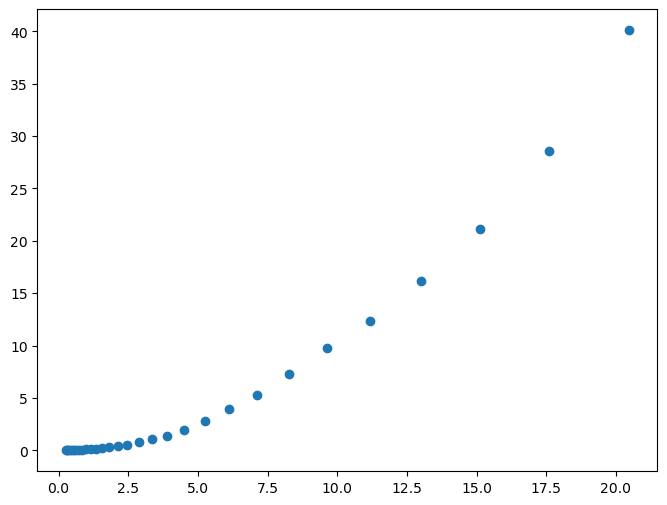

In [240]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(R, var_counts, 'o', label='Density variance')
#ax.set_xscale('log')
#ax.set_yscale('log')

In [68]:
frame = ar._read_frame(10)
LX, LY = frame.LX, frame.LY
Qxx_dat = frame.QQxx.reshape(LX, LY)
Qyx_dat = frame.QQyx.reshape(LX, LY)
defects = mp.nematic.nematicPy.get_defects(Qxx_dat, Qyx_dat, LX, LY)

# Step 1: Convert list of dictionaries to array of defect positions
Ndefects = len(defects)

defect_positions = np.empty([Ndefects, 2])
for i, defect in enumerate(defects):
        defect_positions[i] = defect['pos']

if 0:
        f, s = plt.subplots( figsize=(6,6))
        mp.nematic.plot.director(frame, s)
        mp.nematic.plot.defects(frame, s)

        s.set_title("Director field and defects for frame {}".format(10), y = 1.05)
        s.text(0.35, 1.015, '-1/2', transform=s.transAxes, fontsize=14, verticalalignment='bottom', color='blue', fontweight='bold')
        s.text(0.55, 1.015, '+1/2', transform=s.transAxes, fontsize=14, verticalalignment='bottom', color='green', fontweight='bold')


In [ ]:

x_boundaries = [0, LX]
y_boundaries = [0, LY] 
N = 2000
boundaries = [x_boundaries, y_boundaries] 
#defect_positions= np.random.uniform(x_boundaries[0], x_boundaries[1], (N, 2))
X = np.linspace(x_boundaries[0], x_boundaries[1], 50)
Y = np.linspace(y_boundaries[0], y_boundaries[1], 50)
defect_positions = np.array(np.meshgrid(X, Y)).T.reshape(-1, 2)

In [172]:
from structure_factor.point_pattern import PointPattern
from structure_factor.spatial_windows import BoxWindow, BallWindow

window = BallWindow(radius=110, center=[0,0])
point_pattern = PointPattern(defect_positions, window)

In [24]:
frame = ar._read_frame(130)
LX, LY = frame.LX, frame.LY
Qxx_dat = frame.QQxx.reshape(LX, LY)
Qyx_dat = frame.QQyx.reshape(LX, LY)
defects = mp.nematic.nematicPy.get_defects(Qxx_dat, Qyx_dat, LX, LY)

# Step 1: Convert list of dictionaries to array of defect positions
Ndefects = len(defects)

defect_positions = np.empty([Ndefects, 2])
for i, defect in enumerate(defects):
        defect_positions[i] = defect['pos']

if 0:
        f, s = plt.subplots( figsize=(6,6))
        mp.nematic.plot.director(frame, s)
        mp.nematic.plot.defects(frame, s)

        s.set_title("Director field and defects for frame {}".format(10), y = 1.05)
        s.text(0.35, 1.015, '-1/2', transform=s.transAxes, fontsize=14, verticalalignment='bottom', color='blue', fontweight='bold')
        s.text(0.55, 1.015, '+1/2', transform=s.transAxes, fontsize=14, verticalalignment='bottom', color='green', fontweight='bold')

from structure_factor.point_pattern import PointPattern
from structure_factor.spatial_windows import BoxWindow, BallWindow

window = BallWindow(radius=110, center=[LX/2,LX/2])
#window = BoxWindow(bounds=[[0, LX], [0, LY]])    
point_pattern = PointPattern(defect_positions, window)

In [48]:
Nframes = 20
pp = []
window = BallWindow(radius=110, center=[LX/2,LX/2])
for i in range(Nframes):
    frame = ar._read_frame(i)
    LX, LY = frame.LX, frame.LY
    Qxx_dat = frame.QQxx.reshape(LX, LY)
    Qyx_dat = frame.QQyx.reshape(LX, LY)
    defects = mp.nematic.nematicPy.get_defects(Qxx_dat, Qyx_dat, LX, LY)

    # Step 1: Convert list of dictionaries to array of defect positions
    Ndefects = len(defects)
    defect_positions = np.empty([Ndefects, 2])

    for j, defect in enumerate(defects):
            defect_positions[j] = defect['pos']
    pp.append(PointPattern(defect_positions, window))

if 0:
        f, s = plt.subplots( figsize=(6,6))
        mp.nematic.plot.director(frame, s)
        mp.nematic.plot.defects(frame, s)

        s.set_title("Director field and defects for frame {}".format(10), y = 1.05)
        s.text(0.35, 1.015, '-1/2', transform=s.transAxes, fontsize=14, verticalalignment='bottom', color='blue', fontweight='bold')
        s.text(0.55, 1.015, '+1/2', transform=s.transAxes, fontsize=14, verticalalignment='bottom', color='green', fontweight='bold')

from structure_factor.point_pattern import PointPattern
from structure_factor.spatial_windows import BoxWindow, BallWindow

#window = BallWindow(radius=110, center=[0,0])
##window = BoxWindow(bounds=[[0, LX], [0, LY]])    
#point_pattern = PointPattern(defect_positions, window)

In [98]:
x_boundaries = [0, LX]
y_boundaries = [0, LY] 
N = 2000
boundaries = [x_boundaries, y_boundaries] 
defect_positions= np.random.uniform(x_boundaries[0], x_boundaries[1], (N, 2))
X = np.linspace(x_boundaries[0], x_boundaries[1], 50)
Y = np.linspace(y_boundaries[0], y_boundaries[1], 50)
defect_positions = np.array(np.meshgrid(X, Y)).T.reshape(-1, 2)

#window = BoxWindow(bounds=[[0, LX], [0, LY]])    
window = BallWindow(radius=110, center=[LX/2,LX/2])
point_pattern = PointPattern(defect_positions, window)

In [51]:
pcf_list = []

for i in range(Nframes):
    pcf_estimated = pcf.estimate(pp[i], method="fv", Kest=dict(rmax=10), fv=dict(method="c", spar=0.2))
    pcf_list.append(pcf_estimated)

if 0:

    pcf.plot(
        pcf_estimated,
        exact_pcf=point_process.pair_correlation_function,
        figsize=(7, 6),
        color=["grey"],
        style=[".-"],
        ylim = [-1, 7],
    )
    plt.tight_layout(pad=1)

<ErrorbarContainer object of 3 artists>

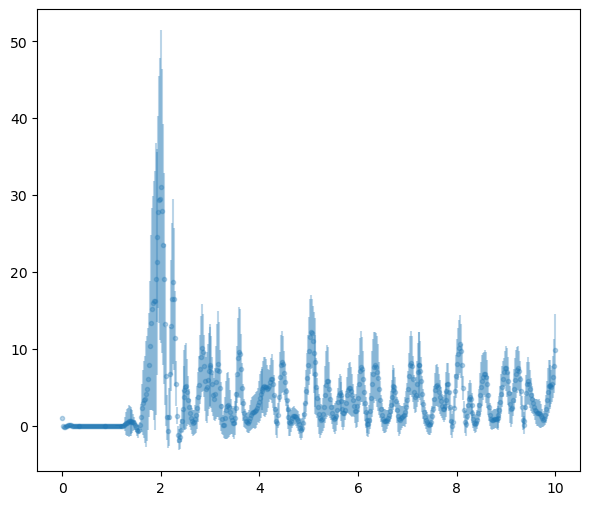

In [69]:
fig,ax = plt.subplots(figsize=(7, 6))
pcf_av = np.mean(pcf_arr, axis=0)
pcf_std = np.std(pcf_arr, axis=0)

ax.errorbar(pcf_estimated.r, pcf_av, yerr=pcf_std, fmt='.', label='Density variance', alpha=0.3)



In [26]:
from structure_factor.hyperuniformity import bin_data

knorms = np.linalg.norm(k, axis=1)
kbins, smeans, sstds = bin_data(knorms, sf_estimated, bins=50,)

In [21]:
param_guess_lin = [0.1, 0.5]

In [ ]:
Npoints = 10
fit = do_chi2_fit(fit_func, np.log(kbins[:Npoints]), np.log(smeans[:Npoints]), (sstds/smeans)[:Npoints], param_guess_lin, verbose = True)
Ndof, chi2, prop = get_statistics_from_fit(fit, len(kbins[:Npoints]), subtract_1dof_for_binning = True)

In [262]:
Ndof, chi2, prop, fit.values

(7,
 24.542298995103373,
 0.0009143493215965836,
 <ValueView alpha=0.177075926969613 beta=0.8405959716323299>)

(0.01, 0.6)

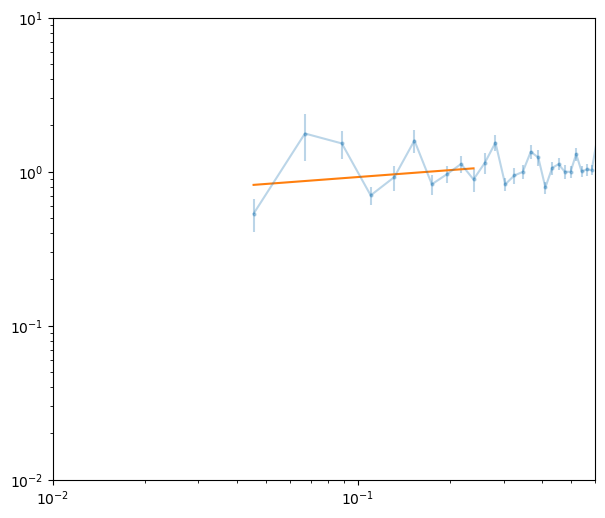

In [28]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.errorbar(kbins, smeans, yerr=sstds, fmt='.-', label='Density variance', alpha=.3, markersize=4)
ax.plot(kbins[:Npoints], np.exp(fit_func(np.log(kbins)[:Npoints], *fit.values[:])), label='Fit')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([0.01, 10])
ax.set_xlim([0.01, 0.6])

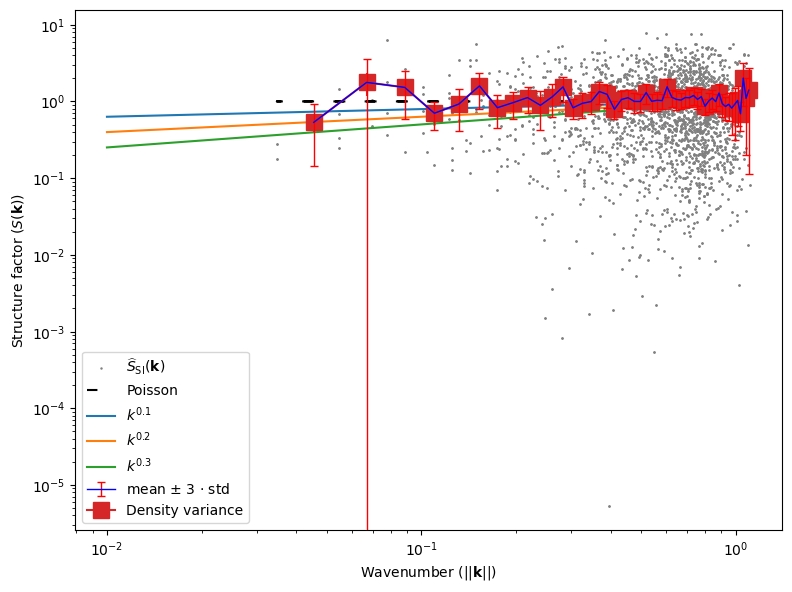

In [29]:
from cProfile import label
from structure_factor.tapers import multi_sinetaper_grid
from structure_factor.utils import meshgrid_to_column_matrix

window = BoxWindow(bounds=[[0, LX], [0, LY]])    
point_pattern = PointPattern(defect_positions, window)
sf = StructureFactor(point_pattern)
k, sf_estimated = sf.scattering_intensity(k_max=.8, debiased=True, direct=True)

# Use the family of sine tapers
x = np.linspace(-2, 2, 80)
x = x[x != 0]
#k = meshgrid_to_column_matrix(np.meshgrid(x, x))

knorms = np.linalg.norm(k, axis=1)
kbins, smeans, sstds = bin_data(knorms, sf_estimated, bins=50,)

#tapers = multi_sinetaper_grid(point_pattern.dimension, p_component_max=2)
#k, sf_estimated = sf.tapered_estimator(k, tapers=tapers, debiased=True, direct=True)


ax = sf.plot_non_isotropic_estimator(
    k,
    sf_estimated,
    plot_type="radial",
    error_bar=True,
    bins=50,
    scale="log",
    label=r"$\widehat{S}_{\mathrm{SI}}(\mathbf{k})$",
)

x = np.linspace(0.01, 0.4, 100  )
plt.plot(x, x**0.1, label=r'$k^{0.1}$')
plt.plot(x, x**0.2, label=r'$k^{0.2}$')
plt.plot(x, x**0.3, label=r'$k^{0.3}$')
plt.errorbar(kbins, smeans, yerr=sstds, fmt='s-', label='Density variance', alpha=1, markersize=12)
plt.legend()

plt.tight_layout(pad=1)

In [63]:
pcf_arr = np.zeros([Nframes, 513])
rad = np.zeros([513])
for i in range(Nframes):
    pcf_arr[i] = pcf_list[i]['pcf']
    if i == 0:
        rad = pcf_list[i]['r']


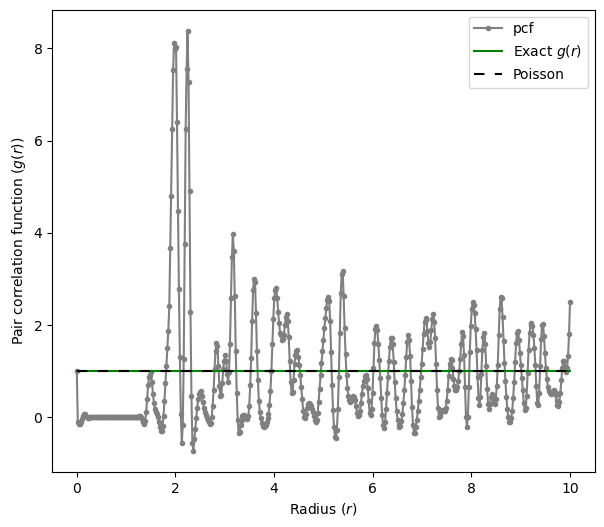

<Figure size 640x480 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt

import structure_factor.pair_correlation_function as pcf
from structure_factor.point_processes import HomogeneousPoissonPointProcess
from structure_factor.spatial_windows import BallWindow

point_process = HomogeneousPoissonPointProcess(intensity=1)
window = BallWindow(center=[LX/2, LX/2], radius=LX/3)

#point_pattern = point_process.generate_point_pattern(window=window)

#window = BallWindow(radius=110, center=[0,0]) 
point_pattern = PointPattern(defect_positions, window)

pcf_estimated = pcf.estimate(
    point_pattern, method="fv", Kest=dict(rmax=10), fv=dict(method="c", spar=0.2)
)

pcf.plot(
    pcf_estimated,
    exact_pcf=point_process.pair_correlation_function,
    figsize=(7, 6),
    color=["grey"],
    style=[".-"],
  #  ylim = [0, 7],
)
plt.tight_layout(pad=1)


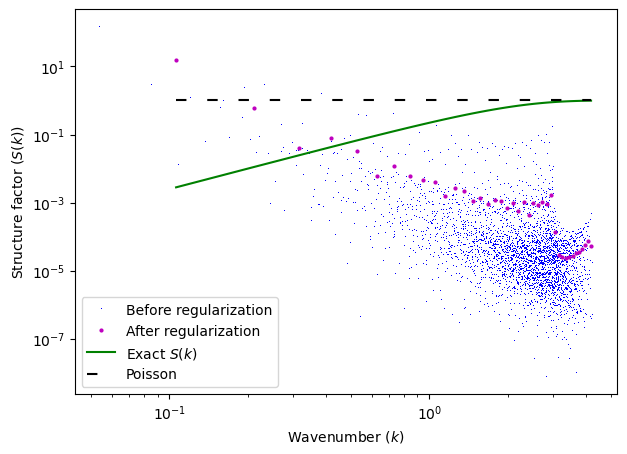

<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import structure_factor.utils as utils
from structure_factor.data import load_data
from structure_factor.hyperuniformity import bin_data
from structure_factor.point_processes import GinibrePointProcess
from structure_factor.spatial_windows import BoxWindow
from structure_factor.structure_factor import StructureFactor

#point_pattern = load_data.load_ginibre()
point_process = GinibrePointProcess()

# Restrict point_pattern to window
LL = 50
#window = BoxWindow([[-LL, LL], [-LL, LL]])
point_pattern_box = point_pattern.restrict_to_window(window)

# Estimate S
sf = StructureFactor(point_pattern_box)
x = np.linspace(0, 3, 80)
x = x[x != 0]
k = utils.meshgrid_to_column_matrix(np.meshgrid(x, x))
k, sf_estimated = sf.scattering_intensity(k)

# bin_data
k_norm = utils.norm(k)
k_norm_binned, sf_estimated_binned, _ = bin_data(k_norm, sf_estimated,bins=40)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(k_norm, sf_estimated, "b,", label="Before regularization", rasterized=True)
sf.plot_isotropic_estimator(
    k_norm_binned,
    sf_estimated_binned,
    axis=ax,
    color="m",
    exact_sf=point_process.structure_factor,
    label="After regularization",
)
ax.legend()
plt.tight_layout(pad=1)

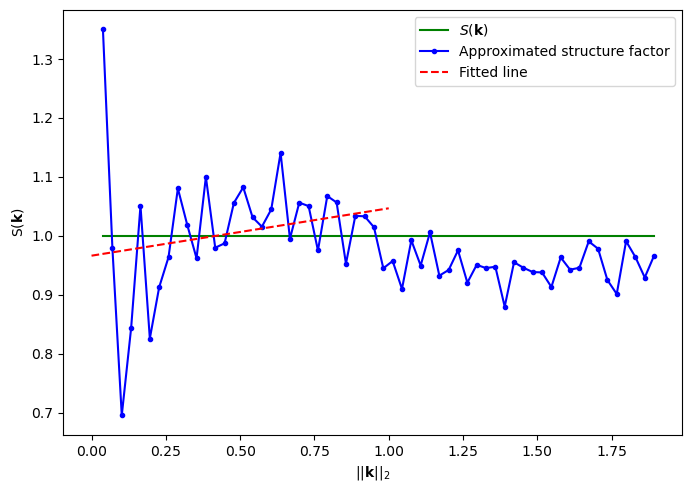

In [182]:
import matplotlib.pyplot as plt
import numpy as np
from structure_factor.data import load_data
from structure_factor.hyperuniformity import effective_hyperuniformity
from structure_factor.point_processes import GinibrePointProcess
from structure_factor.structure_factor import StructureFactor
from structure_factor.tapered_estimators_isotropic import (
    allowed_k_norm_bartlett_isotropic,
)


window = BallWindow(radius=100, center=[LX/2,LX/2])  
point_pattern = PointPattern(defect_positions, window)
sf = StructureFactor(point_pattern)
d, r = point_pattern.dimension, point_pattern.window.radius
k_norm = allowed_k_norm_bartlett_isotropic(dimension=d, radius=r, nb_values=60)
k_norm, sf_estimated = sf.bartlett_isotropic_estimator(k_norm)

summary = effective_hyperuniformity(k_norm, sf_estimated, k_norm_stop=0.5)
x = np.linspace(0, 1, 300)
sf_fitted_line = summary["fitted_line"](x)

sf_theoretical = point_process.structure_factor(k_norm)
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(k_norm, sf_theoretical, "g", label=r"$S(\mathbf{k})$")
ax.plot(k_norm, sf_estimated, "b", marker=".", label="Approximated structure factor")
ax.plot(x, sf_fitted_line, "r--", label="Fitted line")

ax.annotate(
    "H={}".format(summary["H"]),
    xy=(0, 0),
    xytext=(0.01, 0.1),
    arrowprops=dict(facecolor="black", shrink=0.0001),
)
ax.legend()
ax.set_xlabel(r"$||\mathbf{k}||_2$")
ax.set_ylabel(r"$\mathsf{S}(\mathbf{k})$")
plt.tight_layout(pad=1)

In [129]:
frame = ar._read_frame(150)
LX, LY = frame.LX, frame.LY
Qxx_dat = frame.QQxx.reshape(LX, LY)
Qyx_dat = frame.QQyx.reshape(LX, LY)
defects = mp.nematic.nematicPy.get_defects(Qxx_dat, Qyx_dat, LX, LY)

# Step 1: Convert list of dictionaries to array of defect positions
Ndefects = len(defects)

defect_positions = np.empty([Ndefects, 2])
for i, defect in enumerate(defects):
        defect_positions[i] = defect['pos']

if 0:
        f, s = plt.subplots( figsize=(6,6))
        mp.nematic.plot.director(frame, s)
        mp.nematic.plot.defects(frame, s)

        s.set_title("Director field and defects for frame {}".format(10), y = 1.05)
        s.text(0.35, 1.015, '-1/2', transform=s.transAxes, fontsize=14, verticalalignment='bottom', color='blue', fontweight='bold')
        s.text(0.55, 1.015, '+1/2', transform=s.transAxes, fontsize=14, verticalalignment='bottom', color='green', fontweight='bold')

from structure_factor.point_pattern import PointPattern
from structure_factor.spatial_windows import BoxWindow, BallWindow

window = BallWindow(radius=110, center=[LX/2,LX/2])
#window = BoxWindow(bounds=[[0, LX], [0, LY]])    
point_pattern = PointPattern(defect_positions, window)

In [192]:
x_boundaries = [0, LX]
y_boundaries = [0, LY] 
N = 6000
boundaries = [x_boundaries, y_boundaries] 
defect_positionz= np.random.uniform(x_boundaries[0], x_boundaries[1], (N, 2))
X = np.linspace(x_boundaries[0], x_boundaries[1], 50)
Y = np.linspace(y_boundaries[0], y_boundaries[1], 50)
#defect_positions = np.array(np.meshgrid(X, Y)).T.reshape(-1, 2)

#window = BoxWindow(bounds=[[0, LX], [0, LY]])    
window = BallWindow(radius=400, center=[LX/2,LX/2])
point_pattern = PointPattern(defect_positionz, window)

In [154]:
defect_positions.shape

(6659, 2)

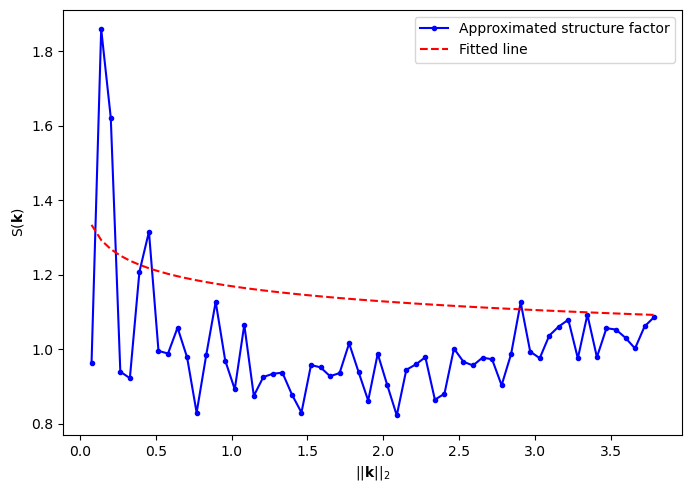

In [17]:
import matplotlib.pyplot as plt
from structure_factor.data import load_data
from structure_factor.hyperuniformity import hyperuniformity_class
from structure_factor.point_processes import GinibrePointProcess
from structure_factor.structure_factor import StructureFactor
from structure_factor.tapered_estimators_isotropic import (
    allowed_k_norm_bartlett_isotropic,
)

window = BallWindow(radius=50, center=[LX/2,LX/2])  
point_pattern = PointPattern(defect_positions, window)
sf = StructureFactor(point_pattern)
d, r = point_pattern.dimension, point_pattern.window.radius
k_norm = allowed_k_norm_bartlett_isotropic(dimension=d, radius=r, nb_values=60)
k_norm, sf_estimated = sf.bartlett_isotropic_estimator(k_norm)

summary = hyperuniformity_class(k_norm, sf_estimated, k_norm_stop=.5)
sf_fitted_0 = summary["fitted_poly"](k_norm)

fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(k_norm, sf_estimated, "b", marker=".", label="Approximated structure factor")
ax.plot(k_norm, sf_fitted_0, "r--", label="Fitted line")

ax.annotate(
    r"$\alpha$ ={}".format(summary["alpha"]),
    xy=(0, 0),
    xytext=(0.01, 0.1),
    arrowprops=dict(facecolor="black", shrink=0.0001),
)
ax.legend()
ax.set_xlabel(r"$||\mathbf{k}||_2$")
ax.set_ylabel(r"$\mathsf{S}(\mathbf{k})$")

plt.tight_layout(pad=1)

C:\Users\Simon Andersen\structure-factor\src\structure_factor\structure_factor.py:263: UserWarning: The computation may take some time for a big number of points in the PointPattern. The complexity is quadratic in the number of points. Start by restricting the PointPattern to a smaller window using  PointPattern.restrict_to_window, then increasing the window progressively.
  warnings.warn(


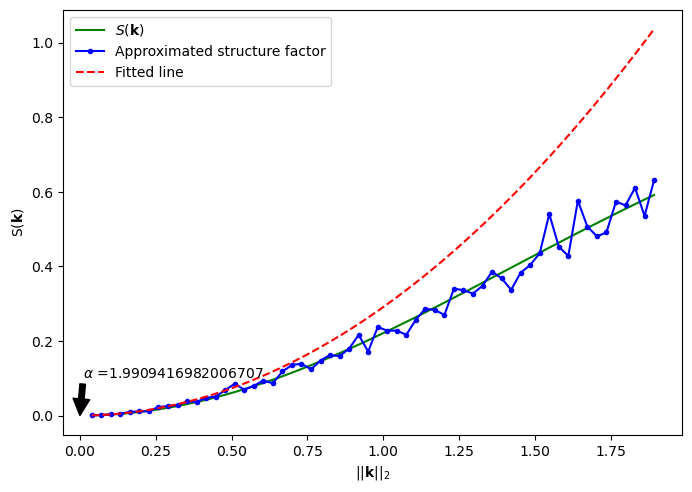

In [1]:
import matplotlib.pyplot as plt
from structure_factor.data import load_data
from structure_factor.hyperuniformity import hyperuniformity_class
from structure_factor.point_processes import GinibrePointProcess
from structure_factor.structure_factor import StructureFactor
from structure_factor.tapered_estimators_isotropic import (
    allowed_k_norm_bartlett_isotropic,
)

point_process = GinibrePointProcess()
point_pattern = load_data.load_ginibre()

sf = StructureFactor(point_pattern)
d, r = point_pattern.dimension, point_pattern.window.radius
k_norm = allowed_k_norm_bartlett_isotropic(dimension=d, radius=r, nb_values=60)
k_norm, sf_estimated = sf.bartlett_isotropic_estimator(k_norm)

summary = hyperuniformity_class(k_norm, sf_estimated, k_norm_stop=0.4)
sf_fitted_0 = summary["fitted_poly"](k_norm)

sf_theoretical = point_process.structure_factor(k_norm)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(k_norm, sf_theoretical, "g", label=r"$S(\mathbf{k})$")
ax.plot(k_norm, sf_estimated, "b", marker=".", label="Approximated structure factor")
ax.plot(k_norm, sf_fitted_0, "r--", label="Fitted line")

ax.annotate(
    r"$\alpha$ ={}".format(summary["alpha"]),
    xy=(0, 0),
    xytext=(0.01, 0.1),
    arrowprops=dict(facecolor="black", shrink=0.0001),
)
ax.legend()
ax.set_xlabel(r"$||\mathbf{k}||_2$")
ax.set_ylabel(r"$\mathsf{S}(\mathbf{k})$")

plt.tight_layout(pad=1)